# A Brief Introduction to Bayesian Data Analysis

<i>Version 2</i>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

## An Example

Suppose we run a real-world experiment consisting of a series of $n$ independent trials, where each trial will result in either a success or failure, and the probability of a success is an unknown value, $p$, where $0 \le p \le 1$.

> By the way, this type of experiment has a <b>Binomial($n$, $p$)</b> distribution. [Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)

Suppose further that, after conducting the $n$ trials, we observed a total of $k_{obs}$ successes. $0 \le k_{obs} \le n$.

We don't know the true value of $p$, but let's assume that $n$ and $k_{obs}$ have the following values:

In [14]:
n = 20  # Number of trials in our real-world experiment
k_obs = 6  # Number of observed successes in our real-world experiment

In [15]:
print(f"Then, an obvious estimate of p is k_obs/n = {k_obs}/{n} = {k_obs/n}")

Then, an obvious estimate of p is k_obs/n = 6/20 = 0.3


In <b>Frequentist</b> (or <b>Classical</b>) data analysis, this estimate is the <b>Maximum Likelihood Estimate (MLE)</b> of $p$.  We won't go into MLEs here, but let's just say that the MLE provides us with, in some sense, an optimal estimate of a fixed parameter.

### Going Beyond the Classical Approach

But, let's say we're not satisfied with the MLE estimate.  It's...too precise.  Couldn't a value of $p=0.3333$ also result in $k_{obs}$ successes?  Yes, it could.  In fact, since we're dealing with random behavior here, any value of $p$, where $0 \lt p \lt 1$, could result in $k_{obs}$ successes.

#### Using Simulation

To get an idea of what values of $p$ produce $k_{obs}$ successes in $n$ trials, we will <b>simulate</b> our real-world experiment, over and over, each time choosing a random value for $p$ (uniformly between 0 and 1) and use it to generate a simulated count of successes in $n$ trials, using a Binomial($n$, $p$) random number generator.  Globally, we'll keep track of the simulated trials that result in $k_{obs}$ successes.


We'll work with two lists of $p$'s:

* <b><i>priors</i></b>: a list of $m$ random numbers, chosen uniformly between 0 and 1

* <b><i>posteriors</i></b> a subset of the priors that, when used in a simulation of n trials, results in $k_{obs}$ successes

<u>Note</u>: The priors list can be generated almost immediately, but the posteriors takes a while, because, for pedagogical reasons, we're using a brute force simulation method.  Efficient simulation methods, such as <b>Markov Chain Monte Carlo (MCMC)</b> methods, are what has made Bayesian Data Analysis a practical tool.  We'll demonstrate MCMC later in this notebook.

In the code below, we've added <i>%time</i> to the posterior calculation so we can see how long it takes.

We also output a count of how many priors actually resulted in a simulation result of $k_{obs}$.  As you can see, there were very few, which is why such a large number of priors was used.

In [22]:
from scipy.stats import uniform, binom

m = 1_000_000  # Number of priors

# Generate Priors and Posteriors
priors = list(uniform.rvs(size=m))
%time posteriors = [p for p in priors if binom.rvs(n,p)==k_obs]
print(f"\nThere were {len(posteriors)} matches out of {m} tries.")

CPU times: user 32.9 s, sys: 400 ms, total: 33.3 s
Wall time: 32.3 s

There were 47264 matches out of 1000000 tries.


#### Prior Histogram (scaled to be a density)

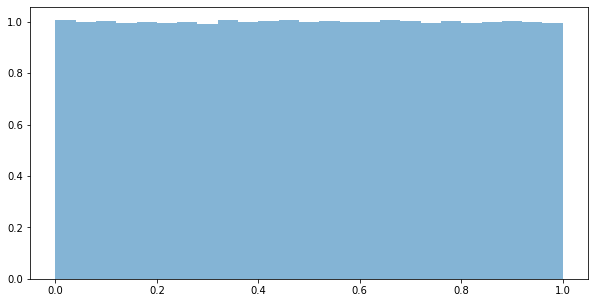

In [23]:
hbins = 25  # Number of bins for histograms
figsize(10,5)
_ = plt.hist(priors, bins=hbins, density=True, alpha=0.55)

#### Posterior Histogram (scaled to be a density)

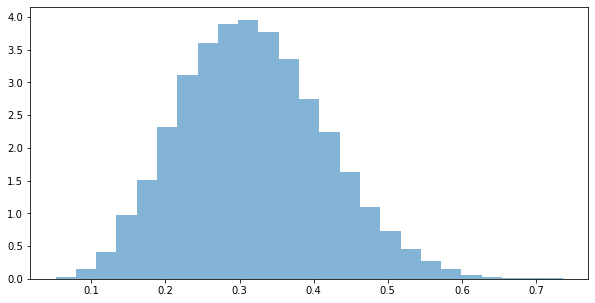

In [25]:
_ = plt.hist(posteriors, bins=hbins, density=True, alpha=0.55)

## Introduction

How one conducts and interprets statistical inferences has been the subject of much debate for many decades.  In the 20th century, the debate was mostly over the <b>Frequentist</b> vs. the <b>Fisherian</b> approaches.  The <b>Bayesian</b> approach was also around during that time, but did not become practical until the 1990s with the advent of efficient simulation methods, such as <b>Markov Chain Monte Carlo (MCMC)</b>, and widespread access to powerful computers. Here, I'll refer the Frequentist and Fisherian approaches as the <b>Classical</b> approach. Today, the debate over how to conduct and interpret statistical inference is more about the Classical vs. Bayesian approaches.

The purpose of this notebook is to provide a brief look at <b>Bayesian Data Analysis (BDA)</b>.

To begin, statistical analyses can be viewed in terms of the mathematical assumptions they make. Three broad categories are listed below, where each one makes successively greater assumptions than the previous one:
1. <b>Exploratory Data Analysis</b> -- No probability model; just descriptive statistics
1. <b>Classical Data Analysis</b> -- Probability model with fixed parameter
1. <b>Bayesian Data Analysis</b> -- Probability model with random parameter, with its own model & fixed <i>hyper-parameter</i>

The following three subsections go into a bit more depth on each of these three categories.

### 1. Exploratory Data Analysis

No probability model.

#### Examples

* Average
* Median
* Quantiles
* Range
* Minimum/Maximum
* Histogram 

### 2. Classical Data Analysis

The probability model consists of a random variable, $X$, with a probability distribution, $F$ and a fixed parameter $\theta$:

$X \sim F(x;\theta)$


#### Example #2

<i><u>Discrete Case</u></i>

In this example the outcomes are integer values, so we'll use $K$ and $k$ instead of $X$ and $x$ for the random variable and its outcome value, resp.

The <b>binomial probability distribution</b>, $Binomial_n(k;\theta)$, is a discrete distribution representing the probability of $k$ successes in $n$ independent trials, where the probability of success on each individual trial is $\theta$, where $0 \le \theta \le 1$.

then $K \sim Binomial_n(k;\theta) \equiv \binom{n}{k} \theta^k(1-\theta)^{n-k}$
> <p>where</p>
> <p>$n \in \{1,2,3,...\}$ -- The fixed number of trials</p>
> <p>$k \in \{0,1,2,...,n\}$ -- Number of successes in n trials (the outcome)</p>
> <p>$\theta \in [0,1]$ -- The fixed probability of success for each trial</p>


### 3. Bayesian Data Analysis

<i>(NOTE: This starts out like the Classical approach, except that it goes a step further by assuming that the parameter itself, $\theta$, has a model.)</i>

Assumes a random variable, $X$, with a specific probability distribution, $F$, and <b>random</b> parameter, $\Theta$, with its own distribution, $G$, and fixed parameter, $\gamma$, sometimes called a hyper-parameter:

$X \sim F(x;\Theta)$ where $\Theta \sim G(\theta;\gamma)$

$G$ is called a <b><i>prior</i></b> distribution.

#### Example #3

<i><u>Discrete Case</u></i>

Building on the discrete model in Example #2, above, except that instead of a fixed success probability, $\theta$, here it is assumed to be a random variable, $\Theta$, with its own distribution, a <b>Beta distribution</b>, $Beta(\theta; \alpha, \beta)$, where $\theta \in [0,1]$, $\alpha > 0$, and $\beta > 0.$

$K \sim Binomial_n(k; \Theta) \equiv \binom{n}{k} \Theta^k(1-\Theta)^{n-k}$

$\Theta \sim Beta(\theta; \alpha, \beta) \equiv \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} \theta^{\alpha - 1} (1-\theta)^{\beta - 1}$

> <p>where</p>
> <p>$n \in \{1,2,3,...\}$ -- Number of trials (a fixed value)</p>
> <p>$k \in \{0,1,2,...,n\}$ -- Number of successes</p>
> <p>$\theta \in [0,1]$ -- The fixed probability of success for each trial
> <p>$\alpha > 0$ and $\beta > 0$</p>

## Scatch Work

<b><i>Probability Theory</i></b> is a subfield of Mathematics that is concerned with mathematical models of random phenomena.


<i><b>Mathematical Statistics</b></i> is a subfield of Probability Theory concerned with the derivation of features of a probability model based on a set of <b>Random Variables (RV)</b> from the model.

<i><b>Applied Statistics</b></i> utilizes the results of Mathematical Statistics by replacing the set of RVs with actual observed data to make <b>statistical inferences</b>.